<a href="https://colab.research.google.com/github/hwan95/Titanic/blob/main/TiTanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Titanic 생존자 예측

##라이브러리

In [348]:
# 데이터처리 및 시각화
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [349]:
#라이브러리 경고 메세지 무시
import warnings
warnings.filterwarnings(action='ignore')

In [350]:
# 머신러닝
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

##데이터 불러오기
- 깃 에서 데이터 셋 불러오기

In [351]:
!git clone https://github.com/hwan95/Titanic.git

fatal: destination path 'Titanic' already exists and is not an empty directory.


In [352]:
train_df= pd.read_csv('./Titanic/train.csv')
test_df = pd.read_csv('./Titanic/test.csv')

###데이터 변수 확인

- 데이터의 크기, 종류, 타입, 형식 
- Nan 데이터 여부

In [353]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [354]:
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [355]:
train_df.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


변수 설명


---


PassengerID : 승객 고유 번호
Survived : 생존 여부
- 0 = 사망
- 1 = 생존

PClass : 객실 등급
- 1st = Upper
- 2nd = Middle
- 3rd = Lower

Name : 이름

Sex : 성별

Age : 나이

SibSp : 같이 탑승한 형제(Sibling)와 배우자(Spouse) 수

Parch : 같이 탑승한 부모(Parent) 와 자녀(Child) 수

Ticket : 탑승권 고유 번호

Fare :  탑승권 요금

Cabin : 객실 번호

Embarked : 승선한 항구 이름
- C = Cherbourg
- Q = Queenstown
- S = Southampton

자료 정보 확인

In [356]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [357]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


###데이터 분석
- nan데이터 개수 파악
- 변수 별 통계 확인

In [358]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Age, Cabin , Embarked 칼럼에서 nan데이터 확인
- Cabin은 전체 891개 데이터 중 687개 가 nan값 으로 유의미한 변수로 생각하기 어려워보인다.

훈련 데이터 int,float 변수 통계치

In [359]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


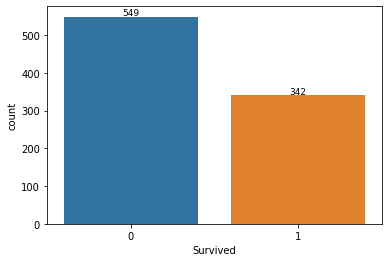

In [360]:
ax = sns.countplot(train_df['Survived'], label= 'count')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, height, ha = 'center', size = 9)

plt.show()


생존율 : 38.4% (Survived의 mean 값 = 0.3838)

카운트 플롯으로 봐도 생존자 수가 사망자 수에 비해 적다

훈련자료 obj 변수 통계치

In [361]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


Sex와 Embakred 칼럼의 freq 값이 유의미해 보임
남성 수 = 577(top, freq 의 sex) : 전체 비율의 약 64%

탑승객이 가장 많이 탑승한 항구 =S 
S에서 탑승한 인원 수 = 644 : 전체 비율의 약 72%

['Surived']에서 사망자(0) 비율 = 약 62%

변수 별 생존율 비교
(생존율을 기준으로 내림차순 정렬)



In [362]:
# PCLass 에 따른 생존율
train_df[['Pclass','Survived']].groupby(['Pclass'], as_index =False).mean().sort_values(by='Survived', ascending =False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


높은 등급의 객실일수록 생존율이 높은 경향을 보인다

In [363]:
#Sex 에 따른 생존율
train_df[['Sex','Survived']].groupby(['Sex'], as_index =False).mean().sort_values(by='Survived', ascending =False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


여성의 생존율이 남성에 비해 매우 높다

In [364]:
#SibSp 에 따른 생존율
train_df[['SibSp','Survived']].groupby(['SibSp'], as_index =False).mean().sort_values(by='Survived', ascending =False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [365]:
#Parch 에 따른 생존율
train_df[['Parch','Survived']].groupby(['Parch'], as_index =False).mean().sort_values(by='Survived', ascending =False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


[SibSp]와 [ParCh]에 따른 생존율을 보면, 동행이 적을수록 높은 생존율을 보이는 것으로 보인다. 

두 데이터를 통합해 동행인 숫자에 관한 변수로 분석해보는 것이 좋아보인다.

In [366]:
#Fare 에 따른 생존율
train_df[['Fare','Survived']].groupby(['Fare'], as_index =False).mean().sort_values(by='Survived', ascending =False)

,Fare,Survived
247,512.3292,1.0
196,57.9792,1.0
89,13.8583,1.0
88,13.7917,1.0
86,13.4167,1.0
...,...,...
103,15.5500,0.0
180,47.1000,0.0
179,46.9000,0.0
178,42.4000,0.0


In [367]:
#Age 에 따른 생존율
train_df[['Age','Survived']].groupby(['Age'], as_index =False).mean().sort_values(by='Survived', ascending =False)

,Age,Survived
0,0.42,1.0
9,5.00,1.0
79,63.00,1.0
68,53.00,1.0
1,0.67,1.0
...,...,...
37,28.50,0.0
49,36.50,0.0
46,34.50,0.0
26,20.50,0.0


[Fare] 와 [Age]의 데이터값이 광범위하기 때문에 테이블로는 데이터를 파악하기 어렵다 

=> 그래프로 분포 확인

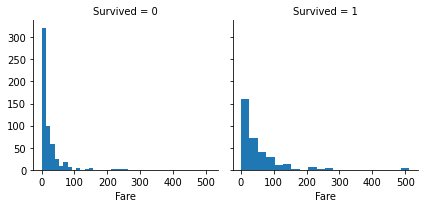

In [368]:
  # Survived 에 따른 요금 Fare 분포
  fare_grid = sns.FacetGrid(train_df, col ='Survived')
  fare_grid.map(plt.hist,'Fare', bins = 20)

Fare 가 100이하에서의 분포가 대부분이다. 

Fare 값이 낮을수록 생존율이 낮다.

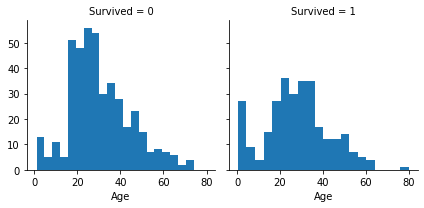

In [369]:
  # Survived 에 따른 요금 Age 분포
  age_grid = sns.FacetGrid(train_df, col ='Survived')
  age_grid.map(plt.hist,'Age', bins = 20)

영유아의 생존율이 높다 

생존자와 사망자의 연령 분포는 전체적으로 비슷해보인다.

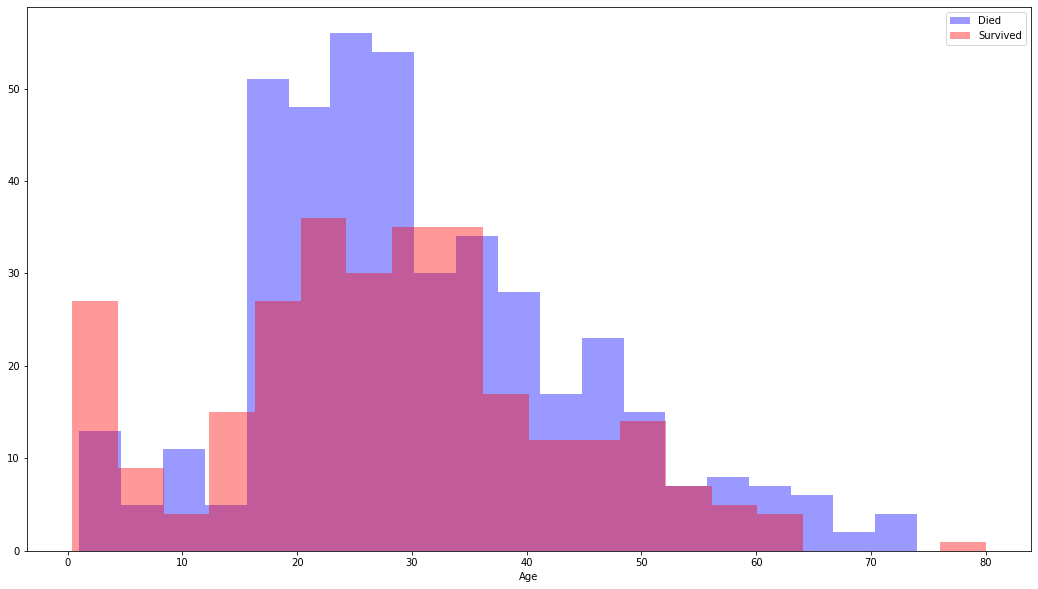

In [370]:
plt.figure(figsize=(18,10))
sns.distplot(train_df[train_df['Survived']==0].Age,bins=20, kde=False, color='b', label='Died')
sns.distplot(train_df[train_df['Survived']==1].Age,bins=20, kde=False, color='r',label='Survived')
plt.legend()

어느 연령대에서 생존률에 차이가 있는 지 확인하기 위해 

두 그래프를 겹쳐 보았다

10대 미만에서 생존자가 사망자 대비 많았고, 20대에서 사망자가 생존자에 비해 많았다.

###그래프

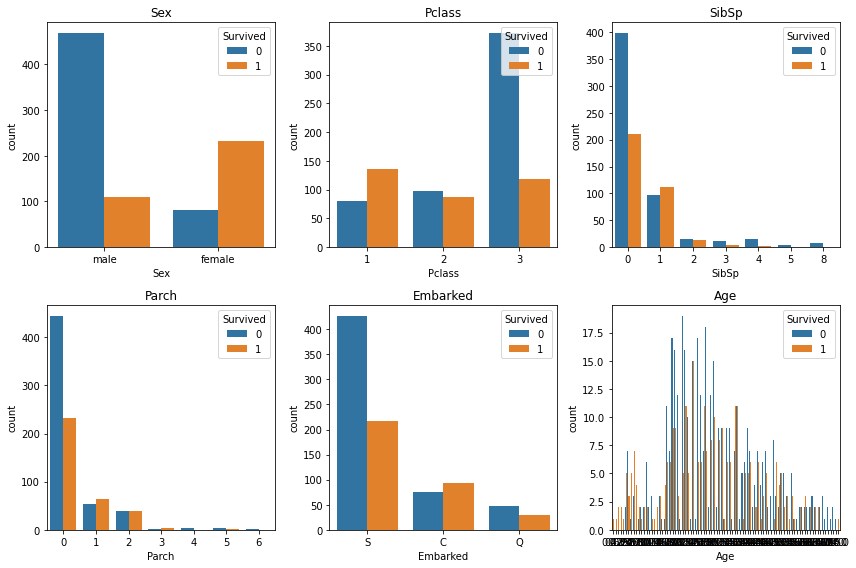

In [371]:
cols = ['Sex','Pclass','SibSp','Parch','Embarked','Age']

n_rows = 2
n_cols = 3

fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*4,n_rows*4))

for r in range(0,n_rows):
  for c in range(0, n_cols):

    i = r*n_cols + c
    ax = axs[r][c]
    sns.countplot(train_df[cols[i]], hue = train_df['Survived'], ax = ax)
    ax.set_title(cols[i])
    ax.legend(title= 'Survived', loc = 'upper right')

plt.tight_layout()

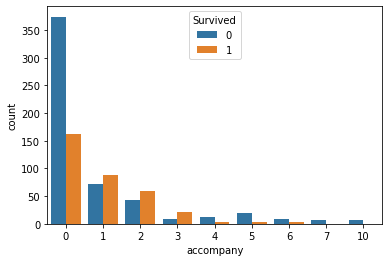

In [372]:
train_df['accompany']= train_df['SibSp'] + train_df['Parch']
sns.countplot(train_df['accompany'], hue=train_df['Survived'])

동행인이 적을수록 생존율이 높아진다

하지만 accompany 값이 0-3 범위에선 사망률 역시 같은 경우를 보인다

특히 accompay = 0 일 경우 사망률이 급격히 증가한다.

In [373]:
train_df.drop(['accompany'], axis=1, inplace = True)

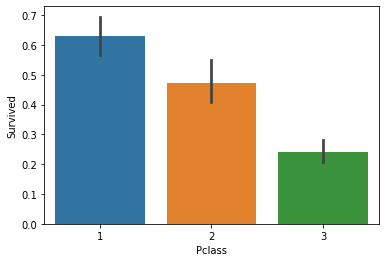

In [374]:
sns.barplot( x = 'Pclass', y ='Survived', data = train_df )

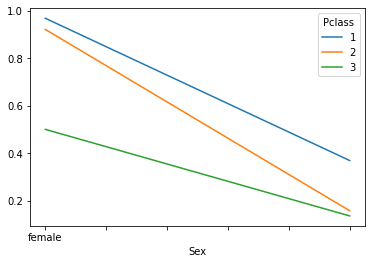

In [375]:
train_df.pivot_table('Survived', index = 'Sex', columns = 'Pclass').plot()

객실 등급과 관계없이 전체적으로 여성의 생존율이 높다. 

같은 여성일면 높은 등급의 객실일수록 생존율이 높다

Text(0.5, 1.0, 'Pclass:Survived vs Dead')

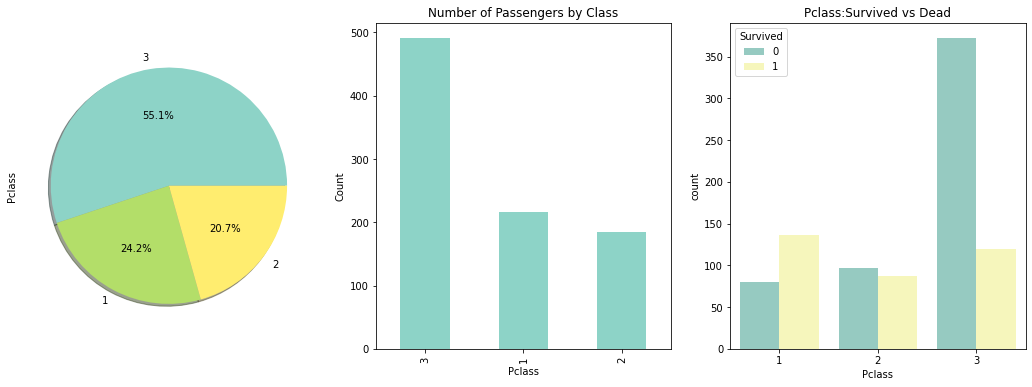

In [376]:
f,ax = plt.subplots(1,3, figsize=(18,6))
train_df['Pclass'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True, cmap='Set3')
train_df['Pclass'].value_counts().plot.bar(cmap='Set3',ax=ax[1])
ax[1].set_title('Number of Passengers by Class')
ax[1].set_ylabel('Count')
ax[1].set_xlabel('Pclass')
sns.countplot('Pclass', hue='Survived',data=train_df, ax=ax[2], palette='Set3')
ax[2].set_title('Pclass:Survived vs Dead')

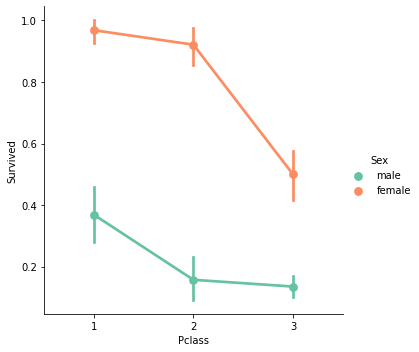

In [377]:
sns.factorplot('Pclass','Survived',hue='Sex',data=train_df, palette='Set2')
plt.show()

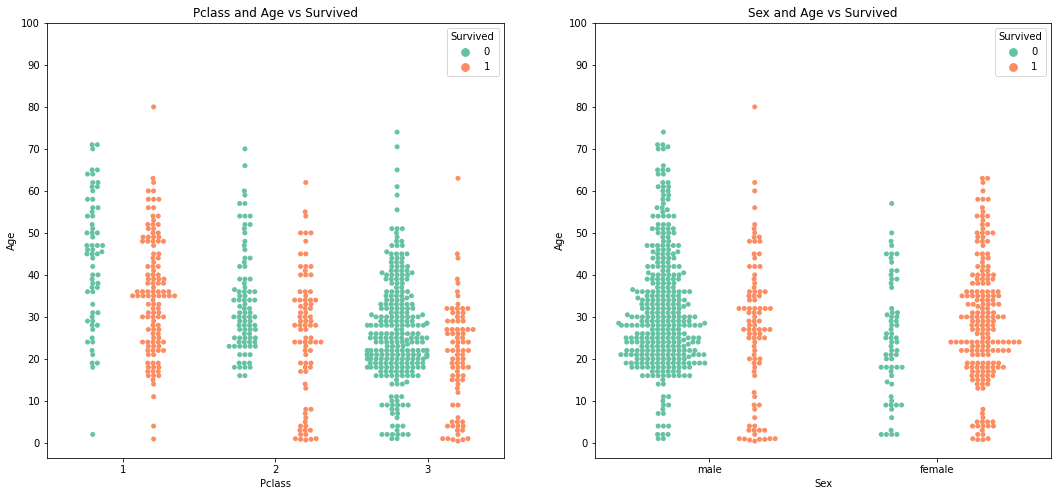

In [378]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.swarmplot("Pclass","Age", hue="Survived", data=train_df,split=True,ax=ax[0],palette='Set2')
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.swarmplot("Sex","Age", hue="Survived", data=train_df,split=True,ax=ax[1],palette='Set2')
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

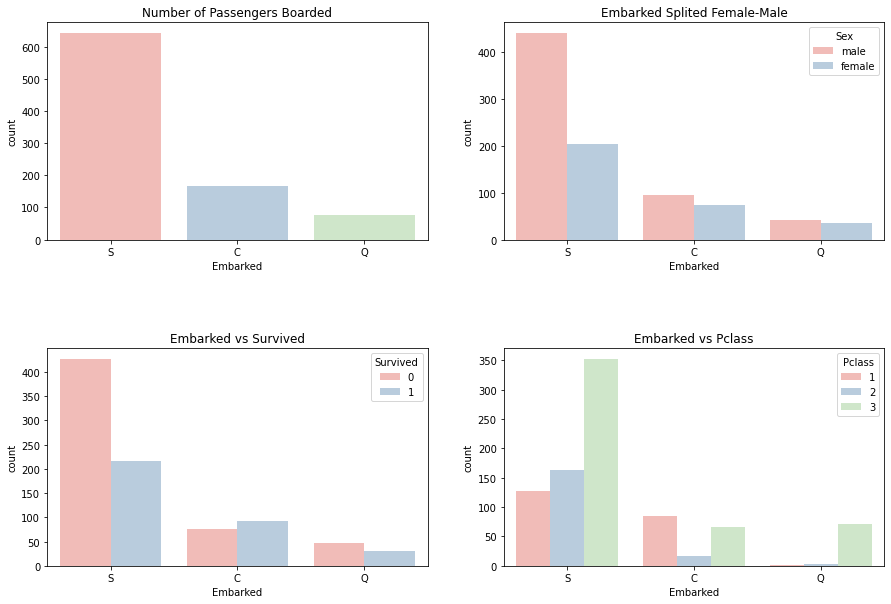

In [379]:
f, ax = plt.subplots(2,2, figsize=(15,10))
sns.countplot('Embarked', data=train_df, ax= ax[0,0], palette='Pastel1')
ax[0,0].set_title('Number of Passengers Boarded')
sns.countplot('Embarked', hue='Sex',data=train_df, ax= ax[0,1], palette='Pastel1')
ax[0,1].set_title('Embarked Splited Female-Male')
sns.countplot('Embarked',hue='Survived', data=train_df, ax= ax[1,0], palette='Pastel1')
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked', hue='Pclass',data=train_df, ax= ax[1,1], palette='Pastel1')
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

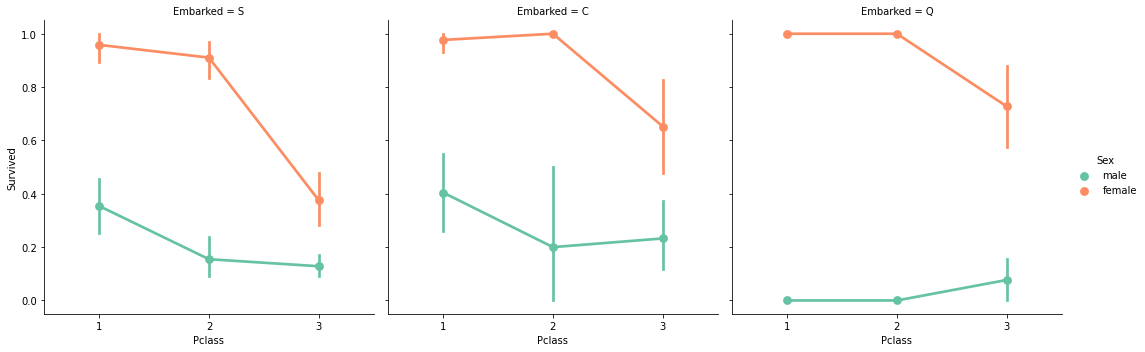

In [380]:
sns.factorplot('Pclass','Survived',hue='Sex',col='Embarked',data=train_df, palette='Set2')
plt.show()

Text(0.5, 1.0, 'Fares in Class 3')

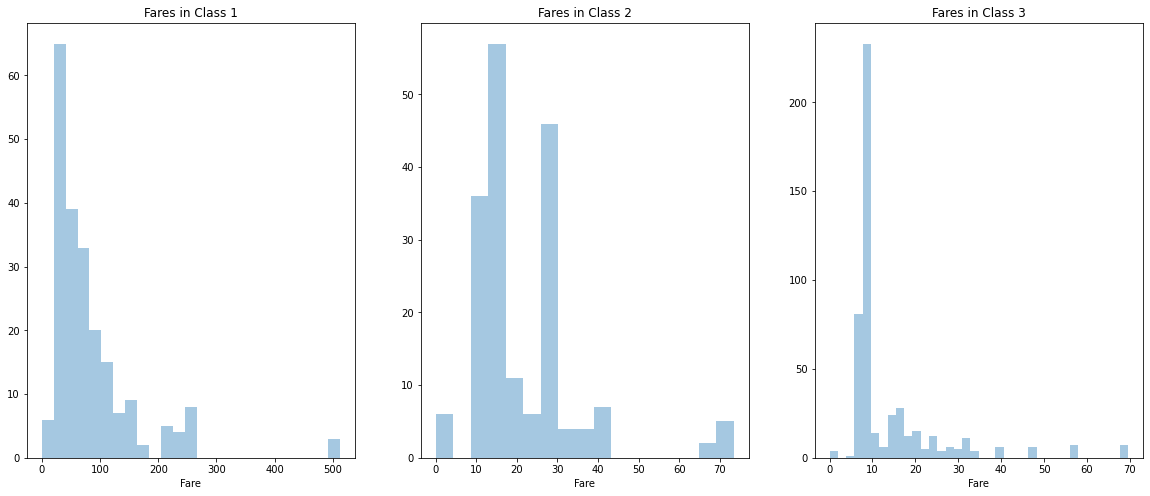

In [381]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(train_df[train_df['Pclass']==1].Fare, ax=ax[0],kde=False)
ax[0].set_title('Fares in Class 1')
sns.distplot(train_df[train_df['Pclass']==2].Fare, ax=ax[1], kde=False)
ax[1].set_title('Fares in Class 2')
sns.distplot(train_df[train_df['Pclass']==3].Fare, ax=ax[2], kde=False)
ax[2].set_title('Fares in Class 3')

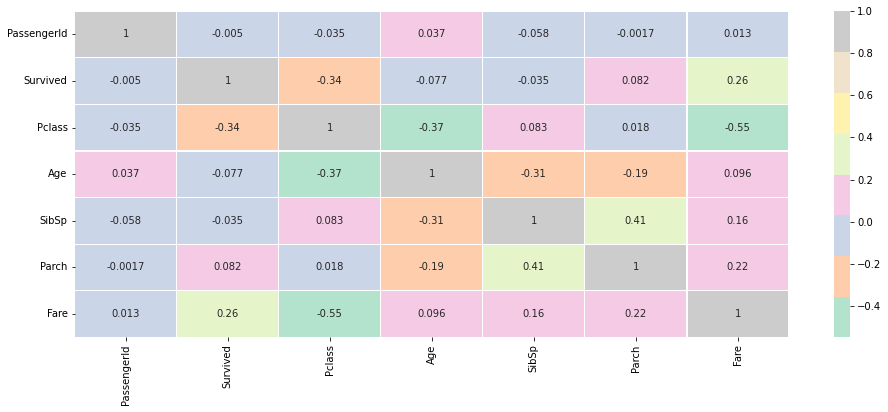

In [382]:
sns.heatmap(train_df.corr(),annot=True,cmap='Pastel2',linewidths=0.2, ) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(16,6)
plt.show()

##데이터 전처리





### 문자열 데이터 처리 : 범주형 변수로 전환 목적

- ['Name'] : 지위, 결혼여부 등을 정보를 파악할 수 있는 단어 추출 후 범주형 변수로 전환
- ['Sex'] :  범주형 변수로 전환

In [384]:
# [Name]
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


성별에 따라 아래 단어들이 빈도값이 높다

- female : Miss(Mlle,Ms : 불어식 표현), Mrs(Mme : 불어식 표현)

- male : Master, Mr

총 4개의 값 이외에 다른값은 기타(etc)로 분류한다

In [385]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Etc')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()


,Title,Survived
0,Etc,0.347826
1,Master,0.575000
2,Miss,0.702703
3,Mr,0.156673
4,Mrs,0.793651


숫자형 변수로 전환

Miss = 0

Mrs = 1

Master = 2

Mr =3

Etc = 4

In [386]:
title_mapping = {"Miss": 0, "Mrs": 1, "Master": 2, "Mr": 3, "Etc": 4}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,3


[Sex] 변수 범주형으로 전환

male = 0

female = 1

In [388]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,3
1,1,1,1,38.0,1,0,71.2833,C,1
2,1,3,1,26.0,0,0,7.9250,S,0
3,1,1,1,35.0,1,0,53.1000,S,1
4,0,3,0,35.0,0,0,8.0500,S,3


### 연속형 데이터 >> 이산형 으로 전환

- Age : 나이대별로 묶기, nan값 처리
- Embarked : 훈련세트 nan값 처리 필요
- Fare : 검증 세트 nan값 처리필요

In [389]:
#Age

for dataset in combine :
    dataset.loc[ dataset['Age'] < 10, 'Age'] = 0
    dataset.loc[(dataset['Age'] >= 10) & (dataset['Age'] < 20), 'Age'] = 1
    dataset.loc[(dataset['Age'] >= 20) & (dataset['Age'] < 30), 'Age'] = 2
    dataset.loc[(dataset['Age'] >= 30) & (dataset['Age'] < 40), 'Age'] = 3
    dataset.loc[(dataset['Age'] >= 40) & (dataset['Age'] < 50), 'Age'] = 4
    dataset.loc[(dataset['Age'] >= 50) & (dataset['Age'] < 60), 'Age'] = 5
    dataset.loc[ dataset['Age'] >= 60, 'Age'] =6

combine = [train_df, test_df]
train_df.head()  

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,2.0,1,0,7.2500,S,3
1,1,1,1,3.0,1,0,71.2833,C,1
2,1,3,1,2.0,0,0,7.9250,S,0
3,1,1,1,3.0,1,0,53.1000,S,1
4,0,3,0,3.0,0,0,8.0500,S,3


In [390]:
train_df['Age'].fillna(train_df['Age'].dropna().mean(), inplace = True)
test_df['Age'].fillna(train_df['Age'].dropna().mean(), inplace = True)

In [391]:
train_df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Title
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,2.514006,0.523008,0.381594,32.204208,2.075196
std,0.486592,0.836071,0.477990,1.312156,1.102743,0.806057,49.693429,1.285162
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000,7.910400,1.000000
50%,0.000000,3.000000,0.000000,2.514006,0.000000,0.000000,14.454200,3.000000
75%,1.000000,3.000000,1.000000,3.000000,1.000000,0.000000,31.000000,3.000000
max,1.000000,3.000000,1.000000,6.000000,8.000000,6.000000,512.329200,4.000000


In [392]:
# Fare
for dataset in combine :
    dataset.loc[ dataset['Fare'] < 20, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] >= 20) & (dataset['Fare'] < 40), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] >= 40) & (dataset['Fare'] < 60), 'Fare'] = 2
    dataset.loc[(dataset['Fare'] >= 60) & (dataset['Fare'] < 80), 'Fare'] = 3
    dataset.loc[(dataset['Fare'] >= 80) & (dataset['Fare'] < 100), 'Fare'] = 4
    dataset.loc[(dataset['Fare'] >= 100) & (dataset['Fare'] <120), 'Fare'] = 5
    dataset.loc[ dataset['Fare'] >= 120, 'Fare'] =6

combine = [train_df, test_df]
train_df.head()  

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,2.0,1,0,0.0,S,3
1,1,1,1,3.0,1,0,3.0,C,1
2,1,3,1,2.0,0,0,0.0,S,0
3,1,1,1,3.0,1,0,2.0,S,1
4,0,3,0,3.0,0,0,0.0,S,3


In [393]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.tail()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
413,1305,3,0,2.514006,0,0,0.0,S,3
414,1306,1,1,3.000000,0,0,5.0,C,4
415,1307,3,0,3.000000,0,0,0.0,S,3
416,1308,3,0,2.514006,0,0,0.0,S,3
417,1309,3,0,2.514006,1,1,1.0,C,2


In [394]:
# nan값 최빈값 'S' 으로 교체
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
# Embarked 변수 범주형으로 전환
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,2.0,1,0,0.0,0,3
1,1,1,1,3.0,1,0,3.0,1,1
2,1,3,1,2.0,0,0,0.0,0,0
3,1,1,1,3.0,1,0,2.0,0,1
4,0,3,0,3.0,0,0,0.0,0,3


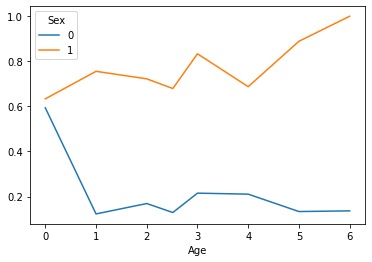

In [395]:
train_df.pivot_table('Survived', index = 'Age', columns = 'Sex').plot()

sex= 0 : male( blue line)
sex= 1 : female( orange line)

여성의 생존율이 전체적으로 높고, 고령일수록 생존율이 증가한다

반면 남성의 생존율은 전체적으로 매우 낮으나, 

10세 미만인 경우만 같은 나이대 여성의 생존율과 비슷하다 


### 특성 통합

- SisSp 와 ParCh를 FamilySize 로 통합


In [396]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

In [398]:
for dataset in combine:
  dataset['IsAlone']=0
  dataset.loc[dataset['FamilySize']==1,'IsAlone']=1

train_df[['IsAlone','Survived']].groupby(['IsAlone'],as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


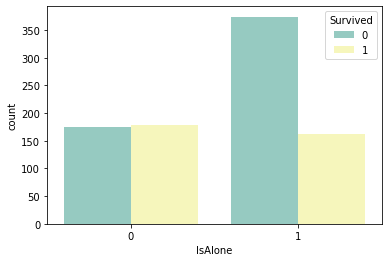

In [399]:
sns.countplot(train_df['IsAlone'], hue = train_df['Survived'],palette= 'Set3')

 동반인원이 적은 경우 생존율과 사망률이 비슷했으나, 
 
 동반인원이 없는 경우 사망률이 급격히 증가

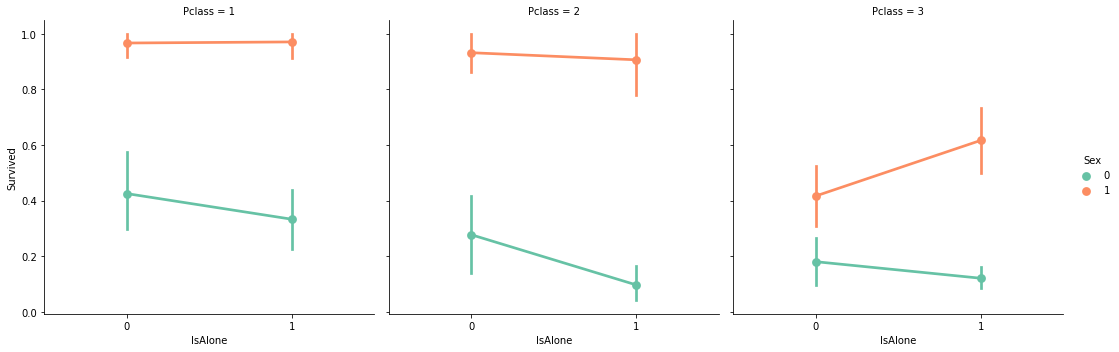

In [423]:
sns.factorplot('IsAlone','Survived',data=train_df,hue='Sex',col='Pclass',palette='Set2')
plt.show()

###부적합한 변수 제거 (Ticket, Cabin)
- Name : 범주형 변수로 전환 어려움

- Ticket, PassengerId : 승객을 구별할 수 있는 고유값이지만 랜덤값으로 무의미

- Cabin : Nan데이터값이 너무 많아 활용하기에 부적합하여 제거

- SibSp, ParCh : IsAlone 변수로 통합



In [383]:
#Ticket, Cabin 제거

print('Before', train_df.shape, test_df.shape)

train_df= train_df.drop(['Ticket','Cabin'], axis =1)
test_df = test_df.drop(['Ticket','Cabin'], axis= 1)

combine = [train_df, test_df]

print('After', train_df.shape, test_df.shape)

Before (891, 12) (418, 11)
After (891, 10) (418, 9)


In [387]:
#PassengerID는 훈련세트에서만 제거
train_df = train_df.drop(['Name','PassengerId'], axis=1)
#Nmae 제거
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape 

((891, 9), (418, 9))

In [397]:
train_df = train_df.drop(['Parch', 'SibSp' ], axis=1)
test_df = test_df.drop(['Parch', 'SibSp'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,0,3,0,2.0,0.0,0,3,2
1,1,1,1,3.0,3.0,1,1,2
2,1,3,1,2.0,0.0,0,0,1
3,1,1,1,3.0,2.0,0,1,2
4,0,3,0,3.0,0.0,0,3,1


### 추가 분석

In [400]:
train_df.pivot_table('Survived', ['IsAlone','Sex'],'Age')

Age          0.000000  1.000000  2.000000  2.514006  3.000000  4.000000  \
IsAlone Sex                                                               
0       0     0.59375  0.142857  0.205882  0.176471  0.200000  0.263158   
        1     0.62069  0.750000  0.710526  0.592593  0.843750  0.571429   
1       0         NaN  0.111111  0.157895  0.121495  0.220779  0.184211   
        1     1.00000  0.764706  0.735294  0.769231  0.821429  0.909091   

Age          5.000000  6.000000  
IsAlone Sex                      
0       0    0.125000  0.200000  
        1    1.000000  1.000000  
1       0    0.136364  0.117647  
        1    0.714286  1.000000

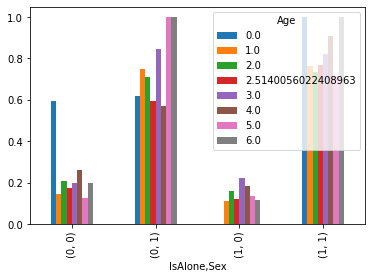

In [401]:
train_df.pivot_table('Survived', ['IsAlone','Sex'],'Age').plot(kind='bar')

IsAlone =1, Sex= 0 : 

3번째 그래프를 보면 혼자인 10세 미만의 남성이 없는 것이 생존율에 큰 영향을 준 것으로 보인다.

동행여부[IsAlone]와 세 변수 탑승지[Embarked],객실등급[Pclass],성별[Sex] 관계 파악  

Text(0.5, 1.0, 'IsAlone vs Pclass survival comparison')

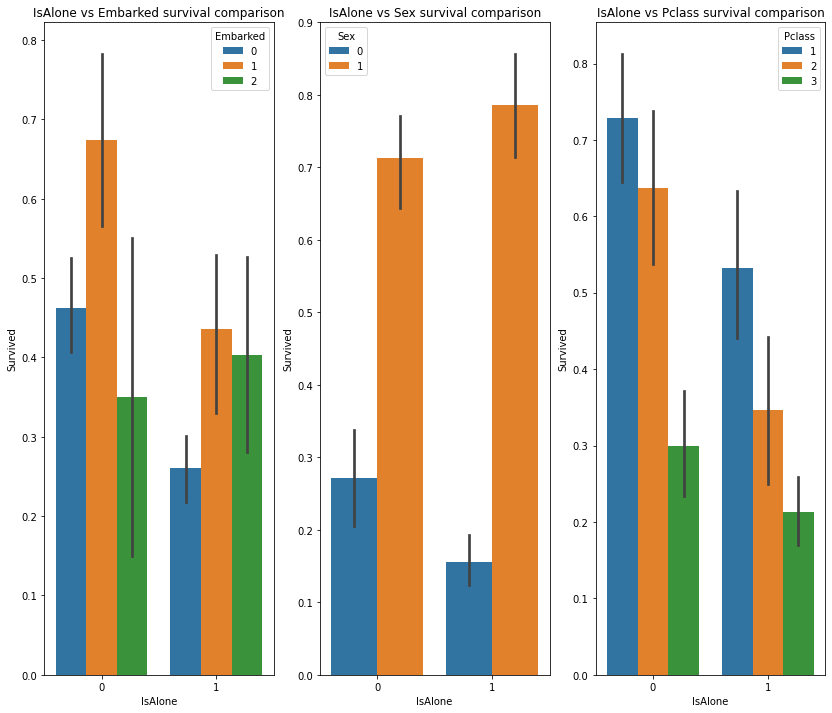

In [424]:
fig , axis = plt.subplots(1,3, figsize=(14,12))

sns.barplot(x="IsAlone", y='Survived', hue = 'Embarked', data= train_df, ax = axis[0] )
axis[0].set_title('IsAlone vs Embarked survival comparison')

sns.barplot(x="IsAlone", y='Survived', hue = 'Sex', data= train_df, ax = axis[1] )
axis[1].set_title('IsAlone vs Sex survival comparison')

sns.barplot(x="IsAlone", y='Survived', hue = 'Pclass', data= train_df, ax = axis[2] )
axis[2].set_title('IsAlone vs Pclass survival comparison')

동승여부에 상관없이 가장 높은 생존율을 보이는 탑승지,성별, 객실 등급은 동일

대부분의 경우 IsAlone = 1 일때보다 0일 때가 생존율이 더 높다


성별에 따른 탑승지, 동행여부, 객실등급 관계 파악

Text(0.5, 1.0, 'Sex vs Pclass survival comparison')

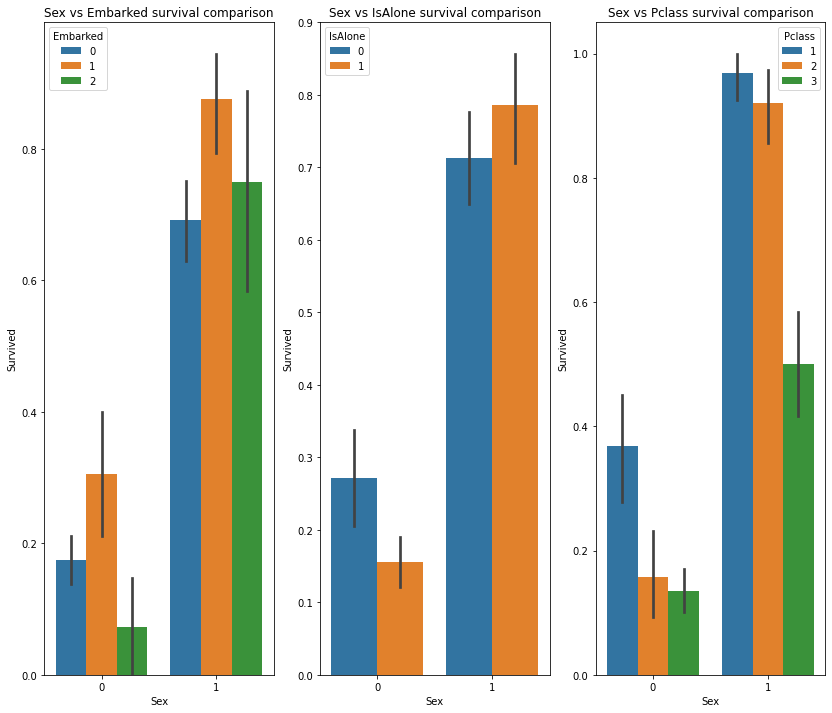

In [403]:
fig , axis = plt.subplots(1,3, figsize=(14,12))

sns.barplot(x="Sex", y='Survived', hue = 'Embarked', data= train_df, ax = axis[0] )
axis[0].set_title('Sex vs Embarked survival comparison')

sns.barplot(x="Sex", y='Survived', hue = 'IsAlone', data= train_df, ax = axis[1] )
axis[1].set_title('Sex vs IsAlone survival comparison')

sns.barplot(x="Sex", y='Survived', hue = 'Pclass', data= train_df, ax = axis[2] )
axis[2].set_title('Sex vs Pclass survival comparison')

모든 경우 여성의 생존율이 남성의 생존율 보다 높다



## 머신러닝

In [404]:
# 목적 변수 제거
X_train = train_df.drop("Survived", axis=1)
#목적 변수 역할
Y_train = train_df["Survived"]
#예측 대상 데이터 셋
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

In [405]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      891 non-null    int64  
 1   Sex         891 non-null    int64  
 2   Age         891 non-null    float64
 3   Fare        891 non-null    float64
 4   Embarked    891 non-null    int64  
 5   Title       891 non-null    int64  
 6   FamilySize  891 non-null    int64  
 7   IsAlone     891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


In [406]:
X_test.isnull().sum()

Pclass        0
Sex           0
Age           0
Fare          0
Embarked      0
Title         0
FamilySize    0
IsAlone       0
dtype: int64

In [431]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
print(acc_log)
Y_pred = logreg.predict(X_test)


80.25


In [410]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,1.385548
4,Embarked,0.212653
3,Fare,0.026595
2,Age,-0.279915
6,FamilySize,-0.392885
5,Title,-0.492381
7,IsAlone,-0.779352
0,Pclass,-1.058348


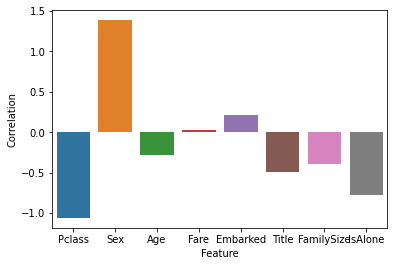

In [471]:
sns.barplot(x = 'Feature', y = 'Correlation', data = coeff_df)

성별이 가장 중요한 특성

나머지 특성은 큰 영향이 없다.

In [432]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)

acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
print(acc_svc)

82.83


In [412]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

82.83

In [413]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

78.45

In [414]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

79.35

In [415]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
print(acc_linear_svc)

80.36


In [416]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

47.7

In [417]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

90.01

In [454]:
importance = decision_tree.feature_importances_
feature_names = decision_tree.feature_names_in_
dt_FI = pd.Series(importance, index= feature_names)
print(dt_FI)

Pclass        0.176739
Sex           0.012640
Age           0.108893
Fare          0.057072
Embarked      0.042075
Title         0.467563
FamilySize    0.101035
IsAlone       0.033984
dtype: float64


결정 트리 모델에서는 TiTle이 가장 큰 특성중요도 값을 보인다.

In [418]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

90.01

In [457]:
RF_importance = random_forest.feature_importances_
RF_feature_names = random_forest.feature_names_in_
RF_FI = pd.Series(importance, index= feature_names)
print(RF_FI)

Pclass        0.122608
Sex           0.197381
Age           0.163646
Fare          0.111170
Embarked      0.050815
Title         0.229986
FamilySize    0.108370
IsAlone       0.016024
dtype: float64


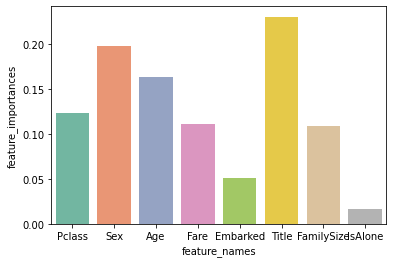

In [463]:
RF_df = pd.DataFrame({'feature_names': RF_feature_names, 'feature_importances': RF_importance})
sns.barplot(x= 'feature_names', y = 'feature_importances', data = RF_df, palette = 'Set2')

In [419]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,90.01
8,Decision Tree,90.01
0,Support Vector Machines,82.83
1,KNN,82.83
7,Linear SVC,80.36
2,Logistic Regression,80.25
5,Perceptron,79.35
4,Naive Bayes,78.45
6,Stochastic Gradient Decent,47.70


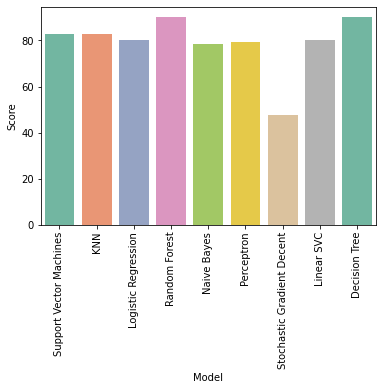

In [470]:
#그래프
sns.barplot( x ='Model', y = 'Score', data = models, palette = 'Set2' )
plt.xticks(rotation = 90)
plt.show()

In [420]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })